In [8]:
#평면상의 점으로 기본적인 K-means 구현
from random import *

#1. Data 생성
#임으로 (0<=x<=10 , 0<=y<=10) or (20<=x<=30, 20<=y<=30)에 점 50개 생성
n=50
x_values=[]
y_values=[]

for i in range(n):
    choose=randrange(2)
    x=0
    y=0
    
    if choose==0:
        x=randint(0,10)
        y=randint(0,10)
        
    else:
        x=randint(20,30)
        y=randint(20,30)
        
    x_values.append(x)
    y_values.append(y)
    
print(x_values)
print(y_values)

[6, 29, 10, 7, 28, 4, 5, 27, 20, 29, 21, 20, 22, 2, 4, 25, 26, 4, 10, 1, 22, 21, 10, 0, 21, 8, 0, 26, 10, 30, 0, 3, 25, 28, 29, 2, 26, 9, 1, 1, 10, 22, 9, 3, 6, 5, 21, 28, 24, 30]
[8, 20, 1, 9, 29, 5, 6, 24, 24, 29, 30, 23, 23, 2, 6, 22, 28, 8, 1, 1, 21, 27, 9, 0, 30, 5, 7, 23, 2, 23, 8, 9, 22, 21, 22, 6, 20, 4, 2, 3, 4, 27, 0, 8, 7, 1, 27, 30, 25, 24]


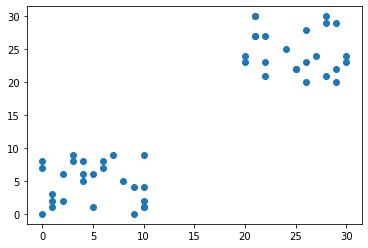

In [9]:
#2. K-means 클러스터링 시작 
#2-a. 좌표에 data 확인
import matplotlib.pyplot as plt
plt.scatter(x_values,y_values)
plt.show()

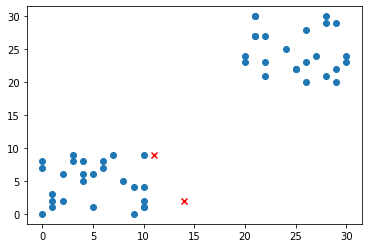

In [14]:
#2-b. 클러스터의 초기 개수 설정
n_cluster=2 #클러스터의 초기 개수

#n_cluster개의 초기 중심값 선정
center_x=[]
center_y=[]

for i in range(n_cluster):
    cx=randint(0,30)
    cy=randint(0,30)
    
    center_x.append(cx)
    center_y.append(cy)

plt.scatter(x_values,y_values)
plt.scatter(center_x,center_y, c='red',marker='x')
plt.show()


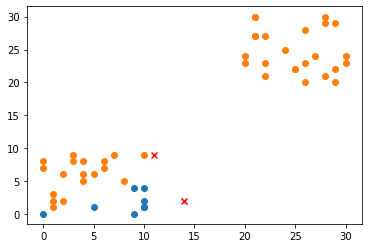

In [17]:
#2-c. 데이터들을 중심값에서 가장 가까운 중심값으로 클러스터
cluster=[[[],[]] for i in range(n_cluster)]

for i in range(n):
    cluster_num=-1 #배정되는 클러스터
    min_d=float("inf") #가장 가까운 거리
    
    for c in range(n_cluster):
        #(루트 생략)
        distance=abs(x_values[i]-center_x[c])**2+abs(y_values[i]-center_y[c])**2
        
        if min_d>distance:
            min_d=distance
            cluster_num=c
        
    #클러스터 배정
    cluster[cluster_num][0].append(x_values[i])
    cluster[cluster_num][1].append(y_values[i])

    
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']    
for c in range(n_cluster):
    plt.scatter(cluster[c][0],cluster[c][1],c=color[c])
plt.scatter(center_x,center_y, c='red',marker='x')
plt.show()
    

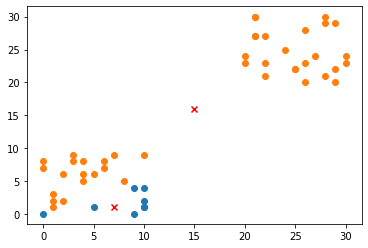

In [18]:
#2-d. 같은 클러스터내 데이터들의 평균값으로 중심값 재조정
for c in range(n_cluster):
    center_x[c]=sum(cluster[c][0])//len(cluster[c][0])
    center_y[c]=sum(cluster[c][1])//len(cluster[c][1])
    
for c in range(n_cluster):
    plt.scatter(cluster[c][0],cluster[c][1],c=color[c])
plt.scatter(center_x,center_y, c='red',marker='x')
plt.show()

In [20]:
#2-e,r. (c)부터 반복하면서 더 이상 중심값 이동이 없을 경우 중단
while True:
    move=0
    
    #2-c. 데이터들을 중심값에서 가장 가까운 중심값으로 클러스터
    cluster=[[[],[]] for i in range(n_cluster)]

    for i in range(n):
        cluster_num=-1 #배정되는 클러스터
        min_d=float("inf") #가장 가까운 거리

        for c in range(n_cluster):
            #(루트 생략)
            distance=abs(x_values[i]-center_x[c])**2+abs(y_values[i]-center_y[c])**2

            if min_d>distance:
                min_d=distance
                cluster_num=c

        #클러스터 배정
        cluster[cluster_num][0].append(x_values[i])
        cluster[cluster_num][1].append(y_values[i])
    
    #2-d. 같은 클러스터내 데이터들의 평균값으로 중심값 재조정
    for c in range(n_cluster):
        ncenter_x=sum(cluster[c][0])//len(cluster[c][0])
        ncenter_y=sum(cluster[c][1])//len(cluster[c][1])
    
        if ncenter_x!=center_x[c] or ncenter_y!=center_y[c]:
            move=1
            center_x[c]=ncenter_x
            center_y[c]=ncenter_y
    
    #더 이상의 중심값 이동 없는 경우 중단
    if move==0:
        break

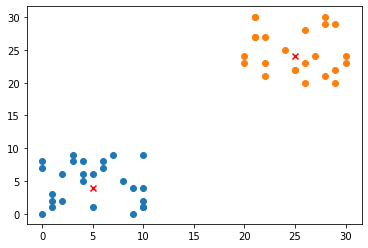

In [21]:
for c in range(n_cluster):
    plt.scatter(cluster[c][0],cluster[c][1],c=color[c])
plt.scatter(center_x,center_y, c='red',marker='x')
plt.show()